##**Task3:- Exploaratory Data Analysis :- Retail**

Task is to perform Exploratory Data Analysis on dataset ‘SampleSuperstore’ and trying to find out the weak areas where  work can be done to make more profit.

Link to the dataset:- https://bit.ly/3i4rbWl

Steps:-
*   Reading the data from csv file
*   Preprocessing the data
*   EDA
*   Data Visualisation
*   Findings

In [ ]:
#importing libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
%matplotlib inline

In [ ]:
# to avoid warnings during execution
from warnings import filterwarnings
filterwarnings('ignore') 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [ ]:
#read data from link 
df = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']))

#displaying first 5 rows of the dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


###**Pre Processing the data**

In [ ]:
#checking the datatypes of columns to check if the datatypes are appropriate for analysis
#sometimes date is not in date format it could be in string format so analysis cannot be done on basis of date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
#number of rows and columns in dataframe
df.shape

(9994, 13)

In [ ]:
#Viewing statistical information for the numerical columns in the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Observation : The count represents the number of not null values of the attribute and since the count is equal to the total number of rows so there are no missing values in the dataset.

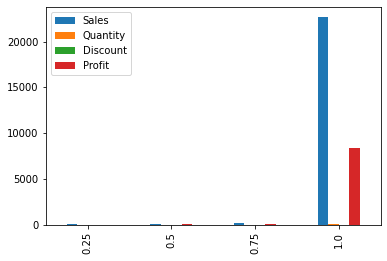

In [ ]:
#Plotting graph to find outliers
df[["Sales","Quantity","Discount","Profit"]].quantile([0.25,0.5,0.75,1]).plot(kind="bar")

Observation : In sales and profit the difference between max value and the 75% percentile value is quite high which indicates outliers in the dataset

In [ ]:
#checking presence of duplicate values
df.duplicated().sum()


17

In [ ]:
# removing the duplicate rows
df=df.drop_duplicates()
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


We can see that the number of rows has decreased to 9977 after deleting the duplciates

In [ ]:
#removing the unnecessary column postal code
df=df.drop(['Postal Code'], axis=1)
df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


##**Exploratory Data Analysis**

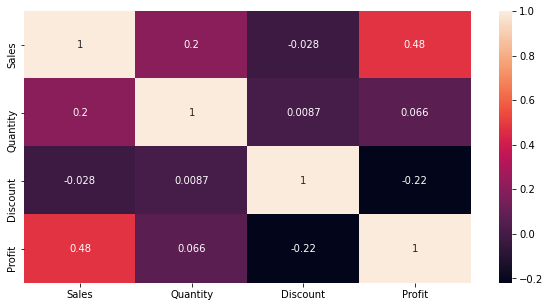

In [ ]:
#finding which attributes have major impact on profit using heat map using the seaborn library
#Correlation analysis indicates the positive or negative or zero correlation between the variables. 
#A positive correlation means that the values of the 2 variables increase together and 
#negative correlation means the values of one variable decrease with the other.Zero correlation implies no correlation.
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

Looking at the correlation of attributes with Profit it can be seen that Discount and Profits are negatively correlated whereas Sales and Profits are positively correlated.

In [ ]:
#checking the number of unique values for each attribute
for i in df.columns:
  print(i,len(df[i].unique()))
print("Ship Modes: " ,df['Ship Mode'].unique())
print("Segments: ",df['Segment'].unique())
print("Regions: ",df['Region'].unique())

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287
Ship Modes:  ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segments:  ['Consumer' 'Corporate' 'Home Office']
Regions:  ['South' 'West' 'Central' 'East']


We can see that the sales data is defined for 3 segments in 4 regions and through 4 shipment modes.



##**Univariate Analysis**
Uni-variate analysis is the analysis involving a single variable (‘uni’) without considering relationships with other variables

###**Segment wise Analysis**

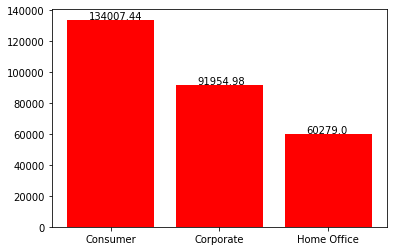

In [ ]:
#Analysing profits earned from each segment of people buying from supermarket
#reset_index() resets and provides new index 
grp=df.groupby(['Segment'])['Profit'].sum().reset_index()
sorted=grp.sort_values(['Profit'],ascending=False)

#plotting bar chart of profit earned from each segment 
X=df['Segment'].unique()
Y=sorted['Profit']
plt.bar(X,Y,color='r')
for i in range(len(X)):
  plt.annotate(np.round(Y[i],2),(-0.2+i,Y[i]+0.5))
plt.show()


###**Observations:**
*   Maximum profit is attained from the consumer segment so store should expand more product line in this segment 
*   Minimum profit is attained from Home office so we need to introduce new marketing stragtegies to increase sales

###**Analysis on Shipment Mode**


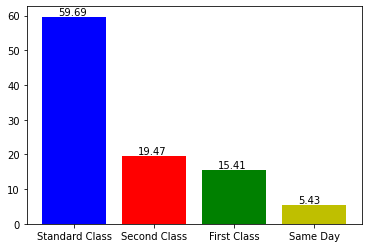

In [ ]:
X=df['Ship Mode'].unique()
Y=df['Ship Mode'].value_counts()/len(df['Ship Mode'])*100
Y.keys()
plt.bar(Y.keys(),Y,color=['b','r','g','y'])
for i in range(len(X)):
  plt.annotate(np.round(Y[i],2),(-0.2+i,Y[i]+0.5))
plt.show()


###**Observations:-**
*   Most of the deliverables around 60% are done through standard class so it shows that this is the most preferrable mode
*   Very less deliverables( approx 5%) are done on same day which can be improved.



###**Region wise Profit Analysis**

In [ ]:
X=df['Region'].unique()
grp=df.groupby(['Region'])['Profit'].sum().reset_index()
sorted=grp.sort_values(['Profit'],ascending=False)
sorted

,Region,Profit
3,West,108329.8079
1,East,91506.3092
2,South,46749.4303
0,Central,39655.8752


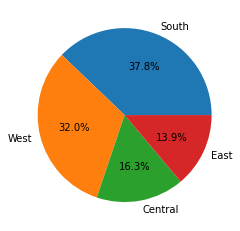

In [ ]:
#plotting pie chart of percentage of total profit each region accounts for
plt.pie(sorted['Profit'], labels=X,autopct='%1.1f%%')
plt.show()

###**Observation:-**

*   South accounts for maximum amount of profits so store should focus on this region to further maximise profit
*   East accounts for minimum profit so we need to review products causing loss in this region




###**Sub-category wise analysis**

In [ ]:
grp=df.groupby(['Category','Sub-Category'])['Profit'].sum().reset_index()
grp

,Category,Sub-Category,Profit
0,Furniture,Bookcases,-3472.5560
1,Furniture,Chairs,26567.1278
2,Furniture,Furnishings,13052.7230
3,Furniture,Tables,-17725.4811
4,Office Supplies,Appliances,18138.0054
5,Office Supplies,Art,6524.6118
6,Office Supplies,Binders,30228.0003
7,Office Supplies,Envelopes,6964.1767
8,Office Supplies,Fasteners,949.5182
9,Office Supplies,Labels,5526.3820


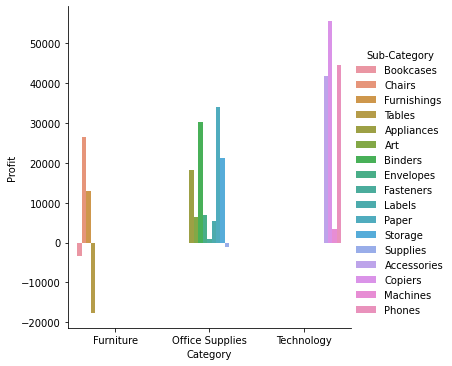

In [ ]:
import seaborn as sns
sns.catplot(x='Category',y='Profit',hue='Sub-Category',data=grp,kind='bar')
plt.show()

###**Observations:-**

Category- Furniture
*   There is loss in sub-categories bookcases and tables so these can either be removed or improved upon. 
*   The sub category of chairs accounts for maximumn profit

Category- Office Supplies
*   There is loss in sub-category supplies so this needs to be improved upon. 
*   The sub category paper provides maximum profit

Category- Technology 
*   The sub category of chairs accounts for maximumn profit
*   Machines account for least amount of profit so this sub category requires attention

###**Analysing the most sold product**

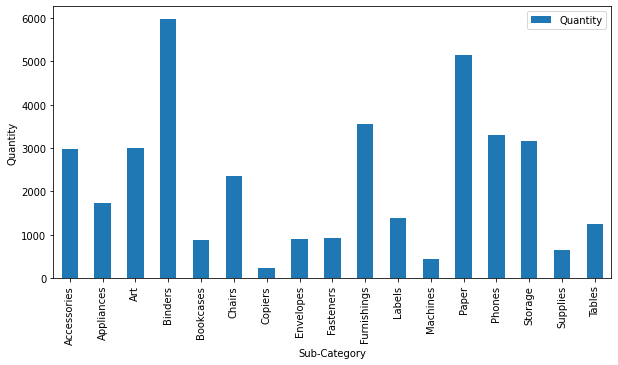

In [ ]:
grp=df.groupby(['Sub-Category'])['Quantity'].sum().reset_index()
grp.plot(kind='bar',figsize=(10,5),xlabel='Sub-Category',ylabel='Quantity',x='Sub-Category',y='Quantity')
plt.show()

###**Observations:-**
*   The most sold products are Binders and papers
*   The least sold items are Copiers and machines



##**Bivariate Analysis**


###**Analysis of Profit with respect to discount**

In [ ]:
#The pivot table takes simple column-wise data as input,
# and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.
# pivot tables as essentially a multidimensional version of GroupBy aggregation.
#unstack displays data in matrix format 
df.groupby(['Segment', 'Discount'])['Profit'].aggregate('mean').unstack()


Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,64.281062,93.630090,15.744638,22.439654,-48.018291,-102.708631,-93.462041,-216.651900,-253.572181,-38.639822,-106.962433,-115.213404
Corporate,71.717580,99.802956,49.282143,23.173335,-46.241380,-82.702010,-132.003562,-280.968633,-388.164788,-40.623326,-68.023771,-97.869076
Home Office,67.079919,97.234865,30.271889,34.783007,-37.834059,-57.226350,-119.900858,-175.146900,-377.121333,-60.039948,-115.479956,-62.509202


###**Observations:-**
*   Discount from 0 to 20 % were yielding profit
*   Discount above 20% were causing losses and so such high discounts should be avoided



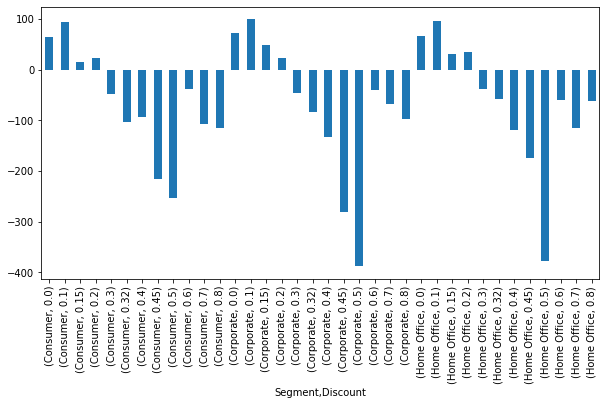

In [ ]:
#plotting profit earned by each segment for different discounts offered by the store
temp=df.groupby(['Segment','Discount'])['Profit'].mean()
temp.plot(kind='bar',stacked=True,figsize=(10,5))
plt.show()

###**Observations:-**


*   Discount of 10% is yielding maximum profit in all segments
*   Discount of 50% is causing maximum loss in all segments

